## Diffusion Coefficient of PB and HOPS

In [1]:
import os
from os.path import join, basename
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [2]:
mean_step_size_threshold_nm = 30  
R2_threshold = 0.85
conversion_factor = 117 
scaling_factor = 0.117

In [3]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for 1x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for 2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [4]:
# Function to load CSV files and add a 'Condition' column
def load_and_label_files(file_paths, label):
    combined_df_list = []
    for file in file_paths:
        df = pd.read_csv(file)
        df['Condition'] = label
        df['title'] = basename(file)
        combined_df_list.append(df)
    combined_df = pd.concat(combined_df_list, ignore_index=True)
    return combined_df

In [5]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, 'PB, Iso')
df_condition2 = load_and_label_files(csv_files_2, 'HOPS')

In [6]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2], ignore_index=True)
df_combined['mean_step_sizes_nm'] = df_combined['mean_step_sizes'] * conversion_factor


In [7]:
filtered_by_step_size = df_combined[df_combined['mean_step_sizes_nm'] > mean_step_size_threshold_nm]
# filtered_by_step_size['step_size_w20'] = filtered_by_step_size['step_size_w20'] * scaling_factor

In [8]:
# final_filtered_df = filtered_by_step_size[filtered_by_step_size['R2'] > R2_threshold]

In [8]:
# Cell: Calculate and display step size statistics
print("\n" + "="*50)
print("STEP SIZE DISTRIBUTION STATISTICS")
print("="*50)

for condition in filtered_by_step_size['Condition'].unique():
    condition_data = filtered_by_step_size[filtered_by_step_size['Condition'] == condition]
    mean_step_size = condition_data['step_size_w20'].mean()
    std_step_size = condition_data['step_size_w20'].std()
    median_step_size = condition_data['step_size_w20'].median()
    count = len(condition_data)
    
    print(f"\n{condition}:")
    print(f"  Mean step size = {mean_step_size:.4f} µm")
    print(f"  Std step size = {std_step_size:.4f} µm")
    print(f"  Median step size = {median_step_size:.4f} µm")
    print(f"  N = {count:,} steps")
    print(f"  Range = [{condition_data['step_size_w20'].min():.4f}, {condition_data['step_size_w20'].max():.4f}] µm")

print("\n" + "="*50)


STEP SIZE DISTRIBUTION STATISTICS

PB, Iso:
  Mean step size = 0.9308 µm
  Std step size = 0.6841 µm
  Median step size = 0.6821 µm
  N = 48,589 steps
  Range = [0.1280, 5.1592] µm

HOPS:
  Mean step size = 0.3799 µm
  Std step size = 0.1845 µm
  Median step size = 0.3322 µm
  N = 915,804 steps
  Range = [0.0000, 3.9912] µm



In [9]:
def calculate_unique_trackID_count(filtered_df, condition):
    condition_df = filtered_df[filtered_df['Condition'] == condition]
    unique_titles = condition_df['title'].unique()
    unique_trackID_count = 0
    for title in unique_titles:
        unique_trackID_count += condition_df[condition_df['title'] == title]['trackID'].nunique()
    return unique_trackID_count

In [10]:
n_PB = calculate_unique_trackID_count(filtered_by_step_size, 'PB, Iso')
n_HOPS = calculate_unique_trackID_count(filtered_by_step_size, 'HOPS')

c:\Users\bisal\.conda\envs\spt-simplified-20240126\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bisal\.conda\envs\spt-simplified-20240126\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bisal\.conda\envs\spt-simplified-20240126\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

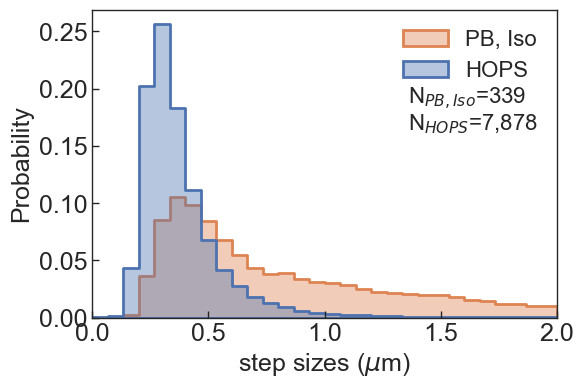

In [11]:
# Plot the probability distribution for each condition without KDE

color_dict = {"PB, Iso": "#DD8452", "HOPS": "#4C72B0"}
plt.figure(figsize=(6, 4))
bins = 30
ax = sns.histplot(
    data=filtered_by_step_size,
    x='step_size_w20',
    hue="Condition",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 2),
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
    palette=color_dict,
    hue_order=["HOPS", "PB, Iso"]
)
# plt.axvline(1, ls="--", c="gray", lw=2)

handles = ax.legend_.legendHandles[::-1]  
ax.legend(handles, ['PB, Iso', 'HOPS'], fontsize=16)  

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

plt.text(
    1.36, 0.187,
    r"N$_{PB, Iso}$=" + f"{n_PB:,}",
    fontdict={"fontsize": 16}
)

plt.text(
     1.36, 0.164,
    r"N$_{HOPS}$=" + f"{n_HOPS:,}",
    fontdict={"fontsize": 16}
)

plt.xlim(0, 2) 
# plt.ylim(0, None)
plt.xlabel('step sizes ($\\mu$m)', fontsize = 18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("step_size_histo.png", format="png", bbox_inches="tight", dpi=600)